In [12]:
# Add the parent directory to sys.path to import from src
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
%load_ext autoreload
%autoreload 2

In [2]:
# Imports
from src.data_process.fetch_api_data import fetch_all_inpi_data, fetch_insee_data_by_siren, save_data_to_csv
from src.data_process.load_save_data_to_sql import load_csv_to_dataframe, merge_dataframes_on_siren, save_dataframe_to_postgres


In [3]:
# Étape 1 : Récupération des données INPI (API v2.1)
inpi_data = fetch_all_inpi_data()

inpi_data

[{'siren': '442962379',
  'date_cloture_exercice': '2016-06-30',
  'chiffre_d_affaires': 0,
  'marge_brute': 0,
  'ebe': 0,
  'ebit': 0,
  'resultat_net': 0,
  'taux_d_endettement': 2.223,
  'ratio_de_liquidite': 816.549,
  'ratio_de_vetuste': None,
  'autonomie_financiere': 2.067,
  'poids_bfr_exploitation_sur_ca': None,
  'couverture_des_interets': None,
  'caf_sur_ca': None,
  'capacite_de_remboursement': None,
  'marge_ebe': None,
  'resultat_courant_avant_impots_sur_ca': None,
  'poids_bfr_exploitation_sur_ca_jours': None,
  'rotation_des_stocks_jours': None,
  'credit_clients_jours': None,
  'credit_fournisseurs_jours': None,
  'type_bilan': 'S',
  'confidentiality': 'Partiellement confidentiel'},
 {'siren': '442962544',
  'date_cloture_exercice': '2018-12-31',
  'chiffre_d_affaires': 93757,
  'marge_brute': 92006,
  'ebe': 58540,
  'ebit': 58316,
  'resultat_net': 47370,
  'taux_d_endettement': 0.534,
  'ratio_de_liquidite': 1139.714,
  'ratio_de_vetuste': 0.206,
  'autonomie_fi

In [ ]:
# Étape 2 : Sauvegarde INPI
save_data_to_csv(inpi_data, "../data/interim/inpi_100_data.csv")

In [3]:
# Étape 3+4+5 : Appel API INSEE depuis le DataFrame INPI et sauvegarde
df_inpi = load_csv_to_dataframe("../data/interim/inpi_100_data.csv")
df_inpi.head()

,siren,date_cloture_exercice,chiffre_d_affaires,marge_brute,ebe,ebit,resultat_net,taux_d_endettement,ratio_de_liquidite,ratio_de_vetuste,...,caf_sur_ca,capacite_de_remboursement,marge_ebe,resultat_courant_avant_impots_sur_ca,poids_bfr_exploitation_sur_ca_jours,rotation_des_stocks_jours,credit_clients_jours,credit_fournisseurs_jours,type_bilan,confidentiality
0,351989702,2017-12-31,66685,64167,23942,22519,18957,6.542,1622.841,45.187,...,30.563,0.281,35.903,33.565,76.081,0.000,29.741,39.368,C,Public
1,351990841,2018-03-31,9671395,2679837,702200,316419,247175,138.846,252.000,66.822,...,5.615,6.529,7.261,2.642,73.970,51.856,25.702,37.293,C,Public
2,351995873,2022-12-31,587900,214314,37020,9540,132250,3.582,1174.676,23.765,...,1.546,1.229,6.297,1.626,164.015,33.863,23.726,7.983,C,Public
3,351998380,2017-12-31,591564,325029,646,10197,11974,0.861,172.392,2.670,...,0.408,0.259,0.109,1.381,89.120,33.548,79.219,65.322,C,Public
4,351998455,2017-12-31,23500,23500,-84,-22262,-22262,0.807,19.966,34.053,...,-0.357,-8.369,-0.357,-94.732,-2268.245,0.000,0.000,27.845,S,Public


In [5]:
df_inpi.count()

siren                                   100
date_cloture_exercice                   100
chiffre_d_affaires                      100
marge_brute                             100
ebe                                     100
ebit                                    100
resultat_net                            100
taux_d_endettement                      100
ratio_de_liquidite                      100
ratio_de_vetuste                         87
autonomie_financiere                    100
poids_bfr_exploitation_sur_ca            69
couverture_des_interets                  74
caf_sur_ca                               69
capacite_de_remboursement                74
marge_ebe                                69
resultat_courant_avant_impots_sur_ca     69
poids_bfr_exploitation_sur_ca_jours      69
rotation_des_stocks_jours                69
credit_clients_jours                     72
credit_fournisseurs_jours                76
type_bilan                              100
confidentiality                 

In [6]:
# Appel API
insee_data = fetch_insee_data_by_siren(df_inpi)
insee_data

[{'siren': '351989702',
  'statutDiffusionUniteLegale': 'O',
  'dateCreationUniteLegale': '1989-07-31',
  'sigleUniteLegale': None,
  'sexeUniteLegale': None,
  'prenom1UniteLegale': None,
  'prenom2UniteLegale': None,
  'prenom3UniteLegale': None,
  'prenom4UniteLegale': None,
  'prenomUsuelUniteLegale': None,
  'pseudonymeUniteLegale': None,
  'identifiantAssociationUniteLegale': None,
  'trancheEffectifsUniteLegale': None,
  'anneeEffectifsUniteLegale': None,
  'dateDernierTraitementUniteLegale': '2025-06-25T17:00:20.023',
  'nombrePeriodesUniteLegale': 7,
  'categorieEntreprise': 'PME',
  'anneeCategorieEntreprise': '2022',
  'periodesUniteLegale': [{'dateFin': None,
    'dateDebut': '2010-08-01',
    'etatAdministratifUniteLegale': 'A',
    'changementEtatAdministratifUniteLegale': False,
    'nomUniteLegale': None,
    'changementNomUniteLegale': False,
    'nomUsageUniteLegale': None,
    'changementNomUsageUniteLegale': False,
    'denominationUniteLegale': 'LE COMPTOIR DE MANO

In [7]:
save_data_to_csv(insee_data, "../data/interim/insee_100_data.csv")

In [ ]:

# Étapes 6–7–8 : Fusion et stockage PostgreSQL
df_insee = load_csv_to_dataframe("../data/interim/insee_100_data.csv")
df_insee.head()

,siren,statutDiffusionUniteLegale,dateCreationUniteLegale,sigleUniteLegale,sexeUniteLegale,prenom1UniteLegale,prenom2UniteLegale,prenom3UniteLegale,prenom4UniteLegale,prenomUsuelUniteLegale,pseudonymeUniteLegale,identifiantAssociationUniteLegale,trancheEffectifsUniteLegale,anneeEffectifsUniteLegale,dateDernierTraitementUniteLegale,nombrePeriodesUniteLegale,categorieEntreprise,anneeCategorieEntreprise,periodesUniteLegale
0,351989702,O,1989-07-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025-06-25T17:00:20.023,7,PME,2022.0,"[{'dateFin': None, 'dateDebut': '2010-08-01', ..."
1,351990841,O,1989-09-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,2022.0,2024-03-22T14:26:06.001,6,PME,2022.0,"[{'dateFin': None, 'dateDebut': '2018-12-10', ..."
2,351995873,O,1989-09-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,00,2022.0,2024-03-22T14:26:06.001,6,PME,2022.0,"[{'dateFin': None, 'dateDebut': '2019-12-23', ..."
3,351998380,O,1989-07-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,03,2022.0,2024-03-22T14:26:06.001,6,PME,2022.0,"[{'dateFin': None, 'dateDebut': '2021-09-01', ..."
4,351998455,O,1989-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-03-22T14:26:06.001,5,PME,2022.0,"[{'dateFin': None, 'dateDebut': '2024-02-28', ..."


In [ ]:
merged_df = merge_dataframes_on_siren(df_inpi, df_insee)
merged_df.head()

,siren,date_cloture_exercice,chiffre_d_affaires,marge_brute,ebe,ebit,resultat_net,taux_d_endettement,ratio_de_liquidite,ratio_de_vetuste,autonomie_financiere,poids_bfr_exploitation_sur_ca,couverture_des_interets,caf_sur_ca,capacite_de_remboursement,marge_ebe,resultat_courant_avant_impots_sur_ca,poids_bfr_exploitation_sur_ca_jours,rotation_des_stocks_jours,credit_clients_jours,credit_fournisseurs_jours,type_bilan,confidentiality,statutDiffusionUniteLegale,dateCreationUniteLegale,sigleUniteLegale,sexeUniteLegale,prenom1UniteLegale,prenom2UniteLegale,prenom3UniteLegale,prenom4UniteLegale,prenomUsuelUniteLegale,pseudonymeUniteLegale,identifiantAssociationUniteLegale,trancheEffectifsUniteLegale,anneeEffectifsUniteLegale,dateDernierTraitementUniteLegale,nombrePeriodesUniteLegale,categorieEntreprise,anneeCategorieEntreprise,periodesUniteLegale
0,351989702,2017-12-31,66685,64167,23942,22519,18957,6.542,1622.841,45.187,88.176,21.134,0.568,30.563,0.281,35.903,33.565,76.081,0.000,29.741,39.368,C,Public,O,1989-07-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025-06-25T17:00:20.023,7,PME,2022.0,"[{'dateFin': None, 'dateDebut': '2010-08-01', ..."
1,351990841,2018-03-31,9671395,2679837,702200,316419,247175,138.846,252.000,66.822,34.542,20.547,8.931,5.615,6.529,7.261,2.642,73.970,51.856,25.702,37.293,C,Public,O,1989-09-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,2022.0,2024-03-22T14:26:06.001,6,PME,2022.0,"[{'dateFin': None, 'dateDebut': '2018-12-10', ..."
2,351995873,2022-12-31,587900,214314,37020,9540,132250,3.582,1174.676,23.765,88.489,45.560,0.500,1.546,1.229,6.297,1.626,164.015,33.863,23.726,7.983,C,Public,O,1989-09-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,00,2022.0,2024-03-22T14:26:06.001,6,PME,2022.0,"[{'dateFin': None, 'dateDebut': '2019-12-23', ..."
3,351998380,2017-12-31,591564,325029,646,10197,11974,0.861,172.392,2.670,44.031,24.756,313.467,0.408,0.259,0.109,1.381,89.120,33.548,79.219,65.322,C,Public,O,1989-07-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,03,2022.0,2024-03-22T14:26:06.001,6,PME,2022.0,"[{'dateFin': None, 'dateDebut': '2021-09-01', ..."
4,351998455,2017-12-31,23500,23500,-84,-22262,-22262,0.807,19.966,34.053,0.259,-630.068,0.000,-0.357,-8.369,-0.357,-94.732,-2268.245,0.000,0.000,27.845,S,Public,O,1989-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-03-22T14:26:06.001,5,PME,2022.0,"[{'dateFin': None, 'dateDebut': '2024-02-28', ..."


In [ ]:
save_data_to_csv(merged_df, "../data/raw/merge_100_data.csv")

In [15]:
merged_df = load_csv_to_dataframe("../data/raw/merge_100_data.csv")
merged_df.head()

,siren,date_cloture_exercice,chiffre_d_affaires,marge_brute,ebe,ebit,resultat_net,taux_d_endettement,ratio_de_liquidite,ratio_de_vetuste,autonomie_financiere,poids_bfr_exploitation_sur_ca,couverture_des_interets,caf_sur_ca,capacite_de_remboursement,marge_ebe,resultat_courant_avant_impots_sur_ca,poids_bfr_exploitation_sur_ca_jours,rotation_des_stocks_jours,credit_clients_jours,credit_fournisseurs_jours,type_bilan,confidentiality,statutDiffusionUniteLegale,dateCreationUniteLegale,sigleUniteLegale,sexeUniteLegale,prenom1UniteLegale,prenom2UniteLegale,prenom3UniteLegale,prenom4UniteLegale,prenomUsuelUniteLegale,pseudonymeUniteLegale,identifiantAssociationUniteLegale,trancheEffectifsUniteLegale,anneeEffectifsUniteLegale,dateDernierTraitementUniteLegale,nombrePeriodesUniteLegale,categorieEntreprise,anneeCategorieEntreprise,periodesUniteLegale
0,351989702,2017-12-31,66685,64167,23942,22519,18957,6.542,1622.841,45.187,88.176,21.134,0.568,30.563,0.281,35.903,33.565,76.081,0.000,29.741,39.368,C,Public,O,1989-07-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025-06-25T17:00:20.023,7,PME,2022.0,"[{'dateFin': None, 'dateDebut': '2010-08-01', ..."
1,351990841,2018-03-31,9671395,2679837,702200,316419,247175,138.846,252.000,66.822,34.542,20.547,8.931,5.615,6.529,7.261,2.642,73.970,51.856,25.702,37.293,C,Public,O,1989-09-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,2022.0,2024-03-22T14:26:06.001,6,PME,2022.0,"[{'dateFin': None, 'dateDebut': '2018-12-10', ..."
2,351995873,2022-12-31,587900,214314,37020,9540,132250,3.582,1174.676,23.765,88.489,45.560,0.500,1.546,1.229,6.297,1.626,164.015,33.863,23.726,7.983,C,Public,O,1989-09-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,00,2022.0,2024-03-22T14:26:06.001,6,PME,2022.0,"[{'dateFin': None, 'dateDebut': '2019-12-23', ..."
3,351998380,2017-12-31,591564,325029,646,10197,11974,0.861,172.392,2.670,44.031,24.756,313.467,0.408,0.259,0.109,1.381,89.120,33.548,79.219,65.322,C,Public,O,1989-07-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,03,2022.0,2024-03-22T14:26:06.001,6,PME,2022.0,"[{'dateFin': None, 'dateDebut': '2021-09-01', ..."
4,351998455,2017-12-31,23500,23500,-84,-22262,-22262,0.807,19.966,34.053,0.259,-630.068,0.000,-0.357,-8.369,-0.357,-94.732,-2268.245,0.000,0.000,27.845,S,Public,O,1989-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-03-22T14:26:06.001,5,PME,2022.0,"[{'dateFin': None, 'dateDebut': '2024-02-28', ..."


In [16]:
selected_columns = [
    "siren", "date_cloture_exercice", "chiffre_d_affaires", "marge_brute", "ebe", "ebit",
    "resultat_net", "taux_d_endettement", "ratio_de_liquidite", "ratio_de_vetuste",
    "autonomie_financiere", "poids_bfr_exploitation_sur_ca", "categorieEntreprise",
    "trancheEffectifsUniteLegale", "statutDiffusionUniteLegale", "dateCreationUniteLegale"
]
df_selected = merged_df[selected_columns]
df_selected.head()

,siren,date_cloture_exercice,chiffre_d_affaires,marge_brute,ebe,ebit,resultat_net,taux_d_endettement,ratio_de_liquidite,ratio_de_vetuste,autonomie_financiere,poids_bfr_exploitation_sur_ca,categorieEntreprise,trancheEffectifsUniteLegale,statutDiffusionUniteLegale,dateCreationUniteLegale
0,351989702,2017-12-31,66685,64167,23942,22519,18957,6.542,1622.841,45.187,88.176,21.134,PME,NaN,O,1989-07-31
1,351990841,2018-03-31,9671395,2679837,702200,316419,247175,138.846,252.000,66.822,34.542,20.547,PME,11,O,1989-09-11
2,351995873,2022-12-31,587900,214314,37020,9540,132250,3.582,1174.676,23.765,88.489,45.560,PME,00,O,1989-09-18
3,351998380,2017-12-31,591564,325029,646,10197,11974,0.861,172.392,2.670,44.031,24.756,PME,03,O,1989-07-07
4,351998455,2017-12-31,23500,23500,-84,-22262,-22262,0.807,19.966,34.053,0.259,-630.068,PME,NaN,O,1989-08-01


In [ ]:

# Enregistrement dans PostgreSQL
from src.data_process.load_save_data_to_sql import save_dataframe_to_postgres
save_dataframe_to_postgres(df_selected)

# Analyse exploratoire

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
# Add the parent directory to sys.path to import from src
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
from src.data_process.transform_and_insert import get_engine

In [6]:
engine = get_engine()

In [7]:
unite_legale = pd.read_sql("SELECT * FROM unite_legale;", engine)
print(f"Unite legale: {unite_legale.shape}")

Unite legale: (272512, 10)


In [8]:
etablissements = pd.read_sql("SELECT * FROM etablissements;", engine)
print(f"Etablissements: {etablissements.shape}")

Etablissements: (288073, 14)


In [9]:
donnees_financieres = pd.read_sql("SELECT * FROM donnees_financieres;", engine)
print(f"Donnees financieres: {donnees_financieres.shape}")

Donnees financieres: (219858, 5)


In [8]:
etablissements = pd.read_csv("../data/processed/etablissements.csv")
unite_legale = pd.read_csv("../data/processed/unite_legale.csv")
donnees_financieres = pd.read_csv("../data/processed/donnees_financieres.csv")

/tmp/ipykernel_1019/580859705.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  etablissements = pd.read_csv("../data/processed/etablissements.csv")
/tmp/ipykernel_1019/580859705.py:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  unite_legale = pd.read_csv("../data/processed/unite_legale.csv")


In [27]:
# Chargement du fichier CSV contenant les codes et les libellés NAF
naf_codes = pd.read_csv('../data/external/code_naf.csv', sep=';', encoding='utf-8', encoding_errors='ignore')

# Exemple de structure attendue : colonnes ['code_naf', 'libelle_naf']
print(naf_codes.head())

        Code                                   Libelle
0        NaN                                       NaN
1  SECTION A         AGRICULTURE, SYLVICULTURE ET PCHE
2        NaN                                       NaN
3         01  Cult. & prod. animale, chasse & sce ann.
4        NaN                                       NaN


In [10]:
# Nombre d'entreprises actives
print("Nombre d'entreprises actives :", unite_legale['siren'].nunique())


Nombre d'entreprises actives : 272512


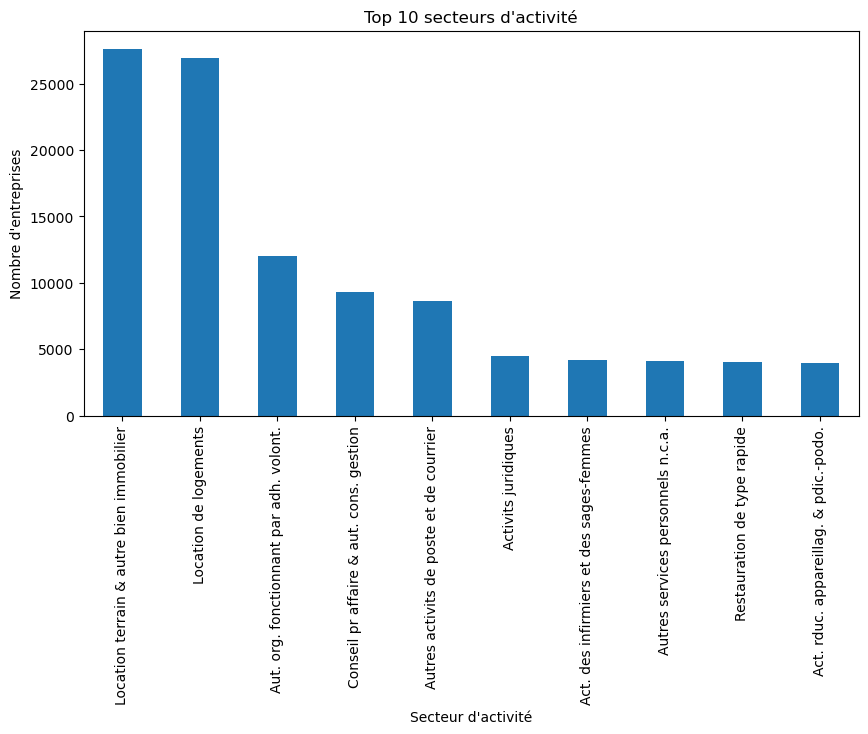

In [28]:
# Répartition des entreprises par secteur d’activité
df_with_libelle = unite_legale.merge(
    naf_codes,
    left_on='activiteprincipaleunitelegale',
    right_on='Code',
    how='left'
)
secteurs = df_with_libelle['Libelle'].value_counts().head(10)
secteurs.plot(kind='bar', figsize=(10, 5), title="Top 10 secteurs d'activité")
plt.ylabel("Nombre d'entreprises")
plt.xlabel("Secteur d'activité")
plt.show()

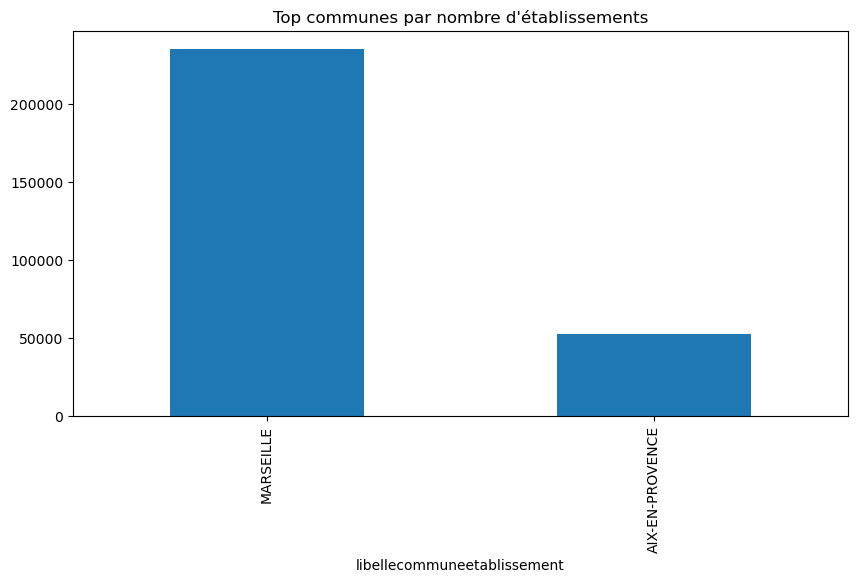

In [14]:
# Répartition des établissements par commune
communes = etablissements['libellecommuneetablissement'].value_counts().head(10)
communes.plot(kind="bar", figsize=(10,5), title="Top communes par nombre d'établissements")
plt.show()


Merged shape: (537843, 27)


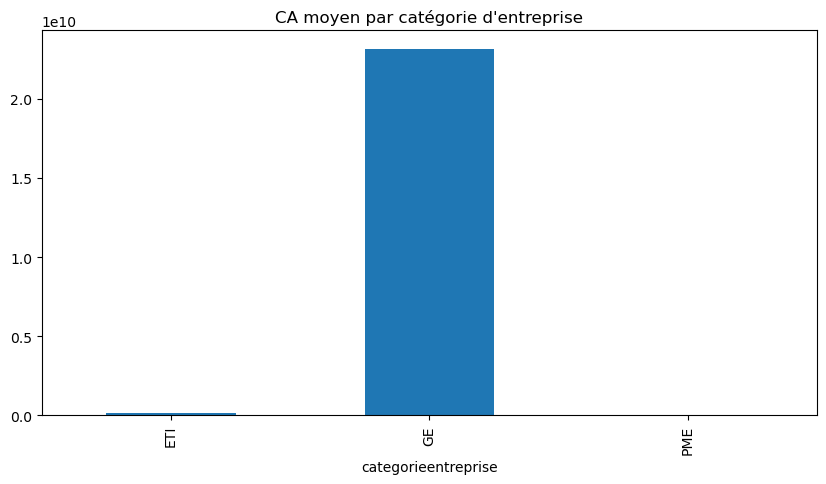

In [16]:
# =========================
# CROSS JOIN (EXEMPLE)
# =========================
merged = etablissements.merge(unite_legale, on="siren", how="left") \
                       .merge(donnees_financieres, on="siren", how="left")

print("Merged shape:", merged.shape)

# Taille et secteur des entreprises avec CA disponible
merged_ca = merged.dropna(subset=["chiffre_d_affaires"])
merged_ca.groupby("categorieentreprise")["chiffre_d_affaires"].mean().plot(
    kind="bar", title="CA moyen par catégorie d'entreprise", figsize=(10,5)
)
plt.show()

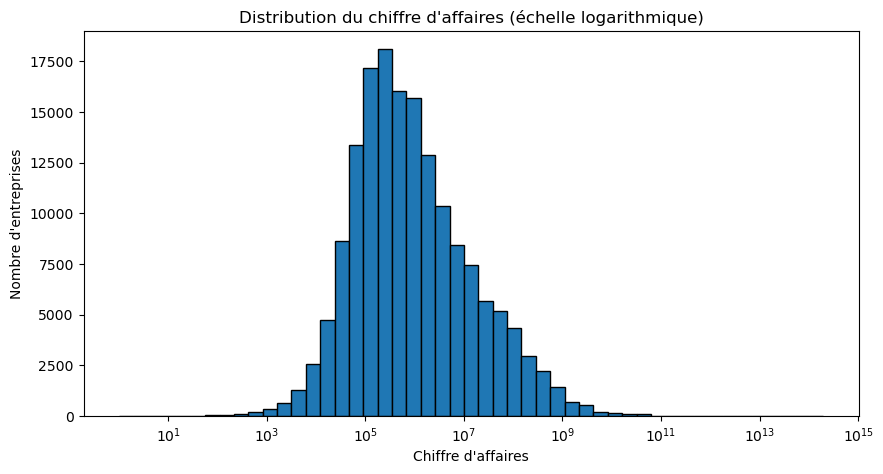

In [40]:
import numpy as np
import matplotlib.pyplot as plt

x = donnees_financieres["chiffre_d_affaires"].dropna()

# Filtrer pour garder seulement les valeurs strictement positives
x_pos = x[x > 0]

# Créer des intervalles logarithmiques
log_bins = np.logspace(np.log10(x_pos.min()), np.log10(x_pos.max()), 50)

plt.figure(figsize=(10, 5))
plt.hist(x_pos, bins=log_bins, edgecolor='black')
plt.xscale('log')
plt.title("Distribution du chiffre d'affaires (échelle logarithmique)")
plt.xlabel("Chiffre d'affaires")
plt.ylabel("Nombre d'entreprises")
plt.show()


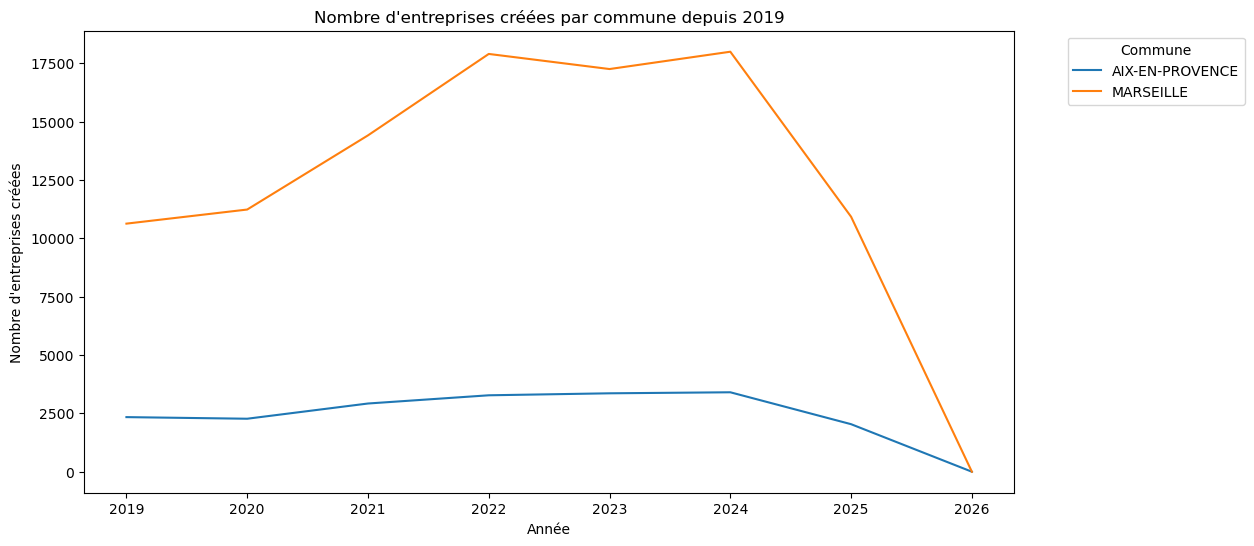

In [34]:
# Extraire l'année de création dans unite_legale
unite_legale['annee_creation'] = pd.to_datetime(unite_legale['datecreationunitelegale'], errors='coerce').dt.year

# Regroupement par commune (exemple), année de création
df_creations = (
    etablissements.merge(unite_legale[['siren', 'annee_creation']], on='siren', how='left')
    .groupby(['libellecommuneetablissement', 'annee_creation'])
    .siren.nunique()  # nb entreprises uniques
    .reset_index(name='nombre_entreprises')
)

# Sélection années récentes (ex : 2019-2024)
df_creations_recent = df_creations[df_creations['annee_creation'] >= 2019]

# Pivot pour graphique
pivot = df_creations_recent.pivot(index='annee_creation', columns='libellecommuneetablissement', values='nombre_entreprises').fillna(0)

pivot.plot(kind='line', figsize=(12,6), title="Nombre d'entreprises créées par commune depuis 2019")
plt.ylabel("Nombre d'entreprises créées")
plt.xlabel("Année")
plt.legend(title='Commune', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

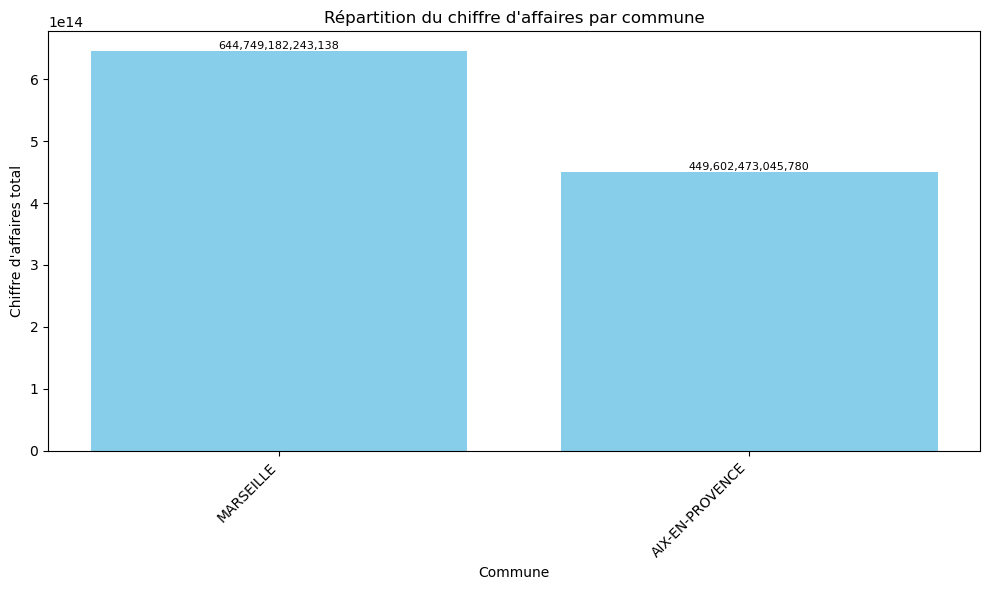

In [14]:
etablissements_ca = etablissements.merge(
    donnees_financieres[['siren', 'chiffre_d_affaires']],
    on='siren',
    how='left'
)

# Calculer le CA total par commune
ca_par_commune = etablissements_ca.groupby('libellecommuneetablissement')['chiffre_d_affaires'].sum().reset_index()

# Trier par CA décroissant
ca_par_commune = ca_par_commune.sort_values(by='chiffre_d_affaires', ascending=False)

# Afficher un bar chart matplotlib
plt.figure(figsize=(10,6))
plt.bar(ca_par_commune['libellecommuneetablissement'], ca_par_commune['chiffre_d_affaires'], color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Commune')
plt.ylabel('Chiffre d\'affaires total')
plt.title('Répartition du chiffre d\'affaires par commune')
plt.tight_layout()

# Ajouter labels au-dessus des barres
for i, v in enumerate(ca_par_commune['chiffre_d_affaires']):
    plt.text(i, v, f"{v:,.0f}", ha='center', va='bottom', fontsize=8)

plt.show()

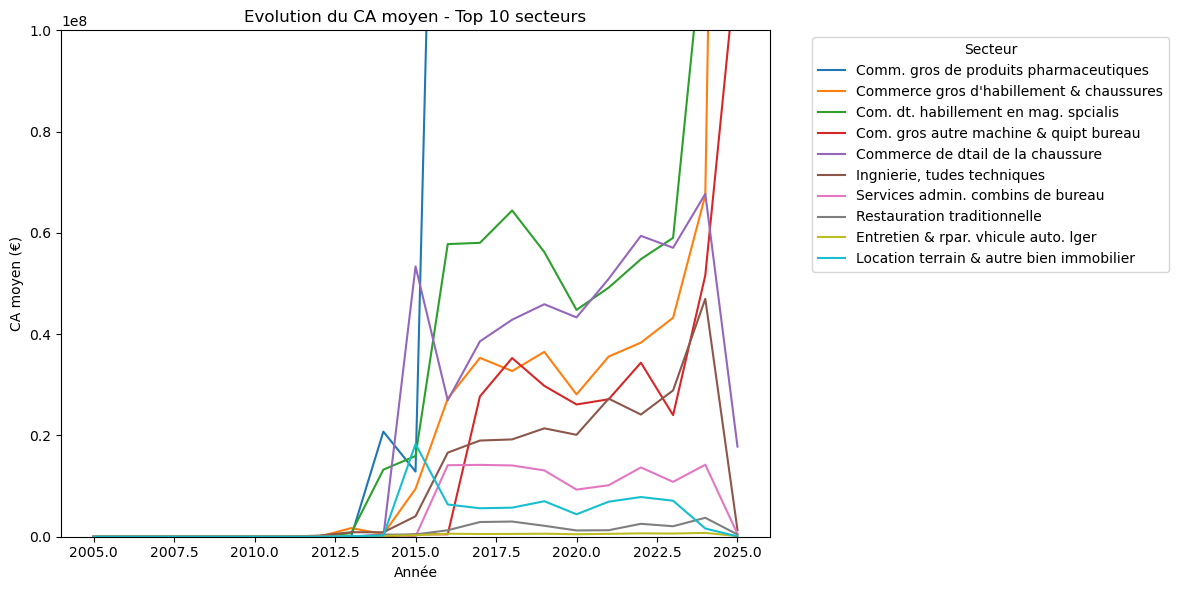

In [ ]:
# On joint donnees_financieres avec unite_legale pour avoir code secteur
df_fin = donnees_financieres.merge(unite_legale[['siren', 'activiteprincipaleunitelegale']], on='siren', how='left')

df_fin = df_fin.merge(
    naf_codes,
    left_on='activiteprincipaleunitelegale',
    right_on='Code',
    how='left'
)

# Extraire année exercice
df_fin['annee_exercice'] = pd.to_datetime(df_fin['date_cloture_exercice'], errors='coerce').dt.year

# Calcul CA moyen par secteur et année
ca_moyen = df_fin.groupby(['annee_exercice', 'Libelle'])['chiffre_d_affaires'].mean().unstack().fillna(0)

# Sélection des secteurs top 20 par CA sur la dernière année
derniere_annee = ca_moyen.index.max()
top_secteurs = ca_moyen.loc[derniere_annee].sort_values(ascending=False).head(10).index

# Sélection de couleurs accessibles aux daltoniens 
colors = plt.get_cmap('tab10')  

# Filtrer et tracer uniquement ces secteurs
ca_moyen.loc[:, top_secteurs].plot(figsize=(12,6), title='Evolution du CA moyen - Top 10 secteurs', color=[colors(i) for i in range(len(top_secteurs))])


plt.ylabel('CA moyen (€)')
plt.xlabel('Année')
plt.legend(title='Secteur', bbox_to_anchor=(1.05,1), loc='upper left')
plt.ylim(0, 1e8)
plt.tight_layout()
plt.show()


In [99]:
import re

def nettoyer_nom(nom):
    # Met en minuscules
    nom = nom.upper()
    # Remplace les tirets et apostrophes par espace et supprime espaces en trop
    nom = re.sub(r"[-']", " ", nom)
    nom = re.sub(r"\s+", " ", nom).strip()
    # Pour Marseille, enlève la partie arrondissement ex: "marseille 8e arrondissement" -> "marseille"
    if nom.startswith("MARSEILLE"):
        nom = "MARSEILLE"
    if nom.startswith("AIX EN PROVENCE"):
        nom = "AIX-EN-PROVENCE"
    return nom

In [119]:
import json
import folium
from IPython.display import display, HTML

def folium_display(m):
    html_data = m.get_root().render()
    # Ajuste si nécessaire la hauteur ou d'autres styles
    display(HTML(html_data))

# Charger le fichier GeoJSON des communes du 13
geojson_path = "../data/external/communes-13-bouches-du-rhone.geojson"
with open(geojson_path, "r", encoding="utf-8") as f:
    geojson_data = json.load(f)

entreprises_par_commune = etablissements['libellecommuneetablissement'].value_counts().reset_index()
entreprises_par_commune.columns = ['commune', 'nb_entreprises']

for feature in geojson_data['features']:
    nom_geo = feature['properties']['nom']
    feature['properties']['nom'] = nettoyer_nom(nom_geo)

# Il faut que dans les propriétés du GeoJSON, la com-+mune correspond à la clé utilisée dans le dataframe
# Adapte ici 'nom' par la clé du GeoJSON qui contient le nom de la commune
# Regarde un feature pour être sûr : geojson_data['features'][0]['properties']

# Initialiser la carte
m = folium.Map(location=[43.5, 5.4], zoom_start=10, tiles="OpenStreetMap")

# Ajouter la couche choroplèthe
folium.Choropleth(
    geo_data=geojson_data,
    name="Choropleth",
    data=entreprises_par_commune,
    columns=['commune', 'nb_entreprises'],
    key_on="feature.properties.nom",  
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.5,  
    line_color='black',
    legend_name='Nombre d\'entreprises par commune'
).add_to(m)

# Ajouter contrôle de couches
folium.LayerControl().add_to(m)


#m.save("../data/external/test_map.html")
# Puis pour afficher ta carte
#folium_display(m)
m

